In [ ]:
!pip3 install python-mnist


In [ ]:
from mnist import MNIST
import os
import tensorflow as tf
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense
from random import shuffle
from random import randrange
from matplotlib import pyplot as plt



mndata = MNIST('drive/MyDrive/byclass')

In [ ]:
images, labels = mndata.load_training()

In [ ]:
count = 0
for i in range(len(images)):
  if labels[i] == 6 and count < 10:
    print(mndata.display(images[i]), labels[i])
    count += 1



............................
............................
............................
............................
............................
............................
............................
.................@@@@@@.....
...............@@@@@@@@@....
..............@@@@@@@@@@....
............@@@@@@@..@@@....
..........@@@@@@...@@@@@....
.........@@@@@...@@@@@@@....
........@@@@....@@@@@@@.....
.......@@@@@....@@@@@@@.....
.....@@@@@.....@@@@@@@@.....
....@@@@@......@@@@@@@......
...@@@@........@@@@@@.......
...............@@@@@........
...............@@@@@........
...............@@@..........
............................
............................
............................
............................
............................
............................
............................ 6

............................
............................
............................
............................
............................
............................
..........

In [ ]:
print(len(images), len(labels))
print(images[0])
for i in range(len(images)):
  for j in range(len(images[i])):
    if images[i][j] >= 70:
      images[i][j] = 1
    else:
      images[i][j] = 0


697932 697932
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 81, 125, 77, 0, 0, 0, 0, 0, 0, 1, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 159, 232, 249, 206, 10, 0, 0, 0, 0, 0, 34, 201, 207, 90, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 170, 254, 254, 254, 253, 113, 4, 0, 0, 0, 0, 84, 233, 253, 218, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 11, 131, 234, 254, 255, 255, 254, 127, 4, 0, 0, 0, 2, 170, 251, 254, 233, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66, 139, 244, 254, 255, 255, 255, 254, 127, 4, 0, 0, 0, 2, 173, 252, 254, 217, 4, 0, 0, 0, 0, 0, 0, 0, 7, 59, 232, 254, 254, 254, 254, 254, 255, 254, 129, 5, 0, 0, 0, 2, 174, 252, 254, 217, 4, 0, 0,

In [ ]:
# index = randrange(0, len(images))

# count = 0
# for index in range(len(images)):
#   if labels[index] == 3 and count < 10:
#     for i in range(28):
#       for j in range(28):
#         print(images[index][i+j*28], end='')
#       print('')
#     print('')
#     count += 1


In [ ]:


model = Sequential()
model.add(Dense(350, input_dim=784, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(62, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
targets = []
for i in range(len(labels)):
  tar = [0]*62
  tar[labels[i]] = 1
  targets += [tar]


In [ ]:
history = model.fit(np.array(images), np.array(targets), validation_split=0.1, epochs=3, batch_size=256)


Epoch 1/3
2454/2454 [==============================] - 43s 17ms/step - loss: 0.9782 - accuracy: 0.7178 - val_loss: 0.5142 - val_accuracy: 0.8249
Epoch 2/3
2454/2454 [==============================] - 39s 16ms/step - loss: 0.4902 - accuracy: 0.8292 - val_loss: 0.4875 - val_accuracy: 0.8279
Epoch 3/3
2454/2454 [==============================] - 38s 15ms/step - loss: 0.4416 - accuracy: 0.8427 - val_loss: 0.4634 - val_accuracy: 0.8380


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


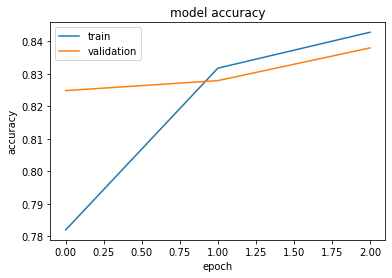

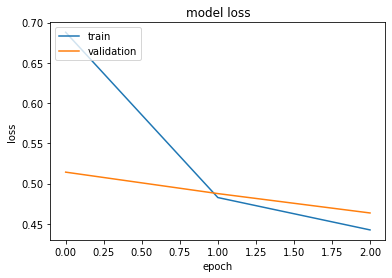

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('drive/MyDrive/my_model')


INFO:tensorflow:Assets written to: drive/MyDrive/my_model/assets


In [ ]:
from keras.models import load_model

testimages, testlabels = mndata.load_testing()

model = load_model('drive/MyDrive/my_model')



In [ ]:
# for i in range(10):
#   print(testlabels[i])

predicted = model.predict(testimages)



# for i in range(20):
# 	p = np.argmax(predicted[i])
# 	t = testlabels[i]
# 	print(p, t)
	# print(alphabets[p], alphabets[t])

In [ ]:
print (type(predicted))

confusion_matrix = [[0 for i in range(62)] for j in range(62)]
correct = 0
for i in range(len(testimages)):
  p = np.argmax(predicted[i])
  actual = testlabels[i]

  if p == actual:
    correct += 1

  confusion_matrix[actual][p] += 1

print(correct/len(testimages))
# for x in confusion_matrix:
#   print(*x)

<class 'numpy.ndarray'>
0.8367734669841734


In [ ]:
import cv2
import copy

In [ ]:
for i in range(20):
  temp = copy.deepcopy(testimages[i])
  # for j in range(28):
  #   for k in range(28):
  #     print(temp[28*j+k], end=' ')
  #   print('')
  # print('')
  for j in range(len(temp)):
    temp[j] = 255-temp[j]
  img = []
  for j in range(28):
    t = []
    for k in range(28):
       t += [temp[j+k*28]]
    img += [t]
  
  # for x in img:
  #   print(x)
  img = np.array(img)
  cv2.imwrite('drive/MyDrive/testpics/'+str(i)+'.png', img)